### Analisis de Datos de IMB Employee Attrition con KNN y Regresion Logistica ###

Los siguientes son dependencias que se importaron para generar los graficos y para hacer el uso de Scikitlearn para la implementacion de los modelos de aprendizaje automatico. 

In [269]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE



df = pd.read_csv('ibm_employee_attrition.csv')

Informacion sobre las columnas o features del dataset

In [198]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### **Preprocesamiento de datos**
A continuacion se van a eliminar 4 columnas que no son relevantes ya que los valores son repetidos o no favorecerian al entrenamiento del modelo. 




In [200]:
df.drop('EmployeeCount', axis = 1, inplace = True) 
df.drop('StandardHours', axis = 1, inplace = True) 
df.drop('EmployeeNumber', axis = 1, inplace = True) 
df.drop('Over18', axis = 1, inplace = True) 



Verifica si dentro de las columnas del dataset hay valores nulos

In [270]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Ahora vamos a revisar los features para verificar que se hayan sido removidos los que seleccionaron como no relevantes.

In [201]:
print(list(df.columns))


['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


Ahora vemos la estructura de los datos asi se lee el dataset, sin embargo se van a hacer modificaciones para el procesamiento de los datos en los 2 modelos. 

In [202]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


### Analisis de caracteristicas del dataset ###

El siguiente grafico analizamos el numero de empleados que salio de la empresa  segun el departamento. Como podemos notar, el demartamento de desarrollo fue uno de los que mas salidas tuvo, sin embargo hay que tomar en cuenta que la empresa trabaja en el area de tecnologia y desarrollo por lo tanto podriamos decir que la mayor cantidad de empleados pertenecen a este departamento. Ademas de que este departamento es el departamento en el que mas personas salieron, es el que mas personal por lo tanto es algo esperable. En segundo lugar esta el departamento de ventas y por ultimo recursos humanos.

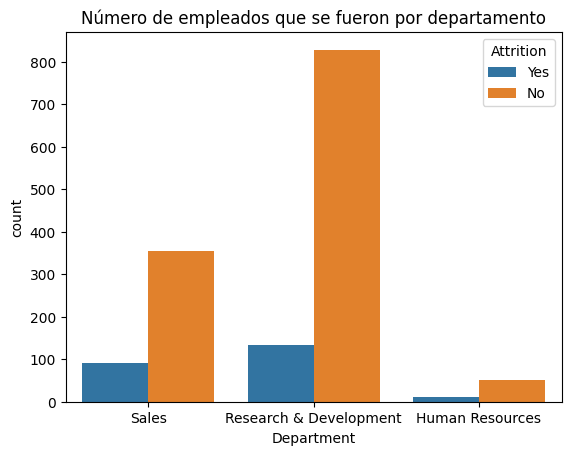

In [203]:
# Número de empleados que se fueron por departamento
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title('Número de empleados que se fueron por departamento')
plt.show()

El siguiente nos muestra la distribucion de la edad del personal que si salio de la empresa. Se aprecia como la mayoria de los empleados ronda entre los 27a los 40 años. Sin embargo la mayor cantidad de empleados que salieron son los que tenia entre 27 a 30. Podria indicar que son personas que buscan una experiencia diferente o algun puesto en otra empresa para seguir desarrollandose profesionalmente, en contraste con los de mayor edad, estos parece que buscan mantenerse en la empresa por mas tiempo.

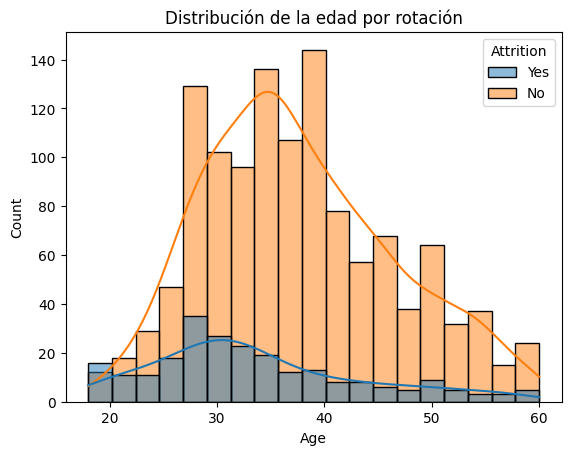

In [204]:
#Distribución de la edad por rotación
sns.histplot(data=df, x='Age', hue='Attrition', kde=True)
plt.title('Distribución de la edad por rotación')
plt.show()

El analisis del genero de los empleados que salieron o no de la empresa en relacion al salario que ganan, muestra que es bastante parejo tanto para hombres como para mujeres aun que las mujeres estan levemente por arriba, se podria decir que no es algo que cambie mucho en esta empresa. Y los salarios parecen bastante equilibrados comparandolos por genero. 

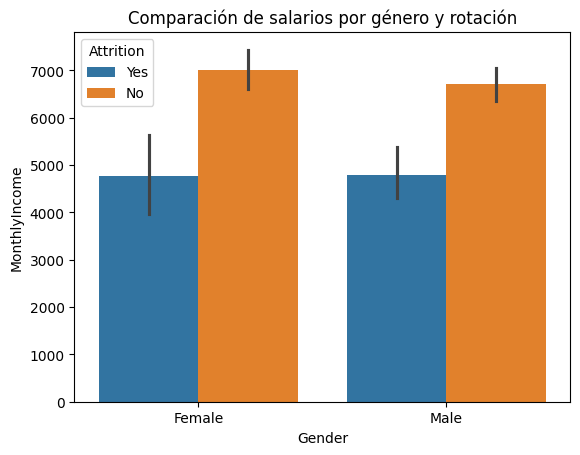

In [205]:
#Comparación de salarios por género y rotación
sns.barplot(x='Gender', y='MonthlyIncome', data=df, hue='Attrition')
plt.title('Comparación de salarios por género y rotación')
plt.show()

Este es uno de las caracteristicas mas interesantes. Se analiza la distribucion de la rotacion en relacion a la carga de trabajo. Podemos notar que aun cuando se considera que se tiene un buen balance, ya que vemos que los que son calificados con 3 o 'Better' es donde mas empleados se quedan en la empresa, es tambien el punto donde mas empleados han abandonado seguido por 2 o 'Good'. Se podria pensar que si se considera que se tienen un balance tan bueno pueda llevar a mantener mas tiempo a la persona en el puesto de trabajo. 

WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

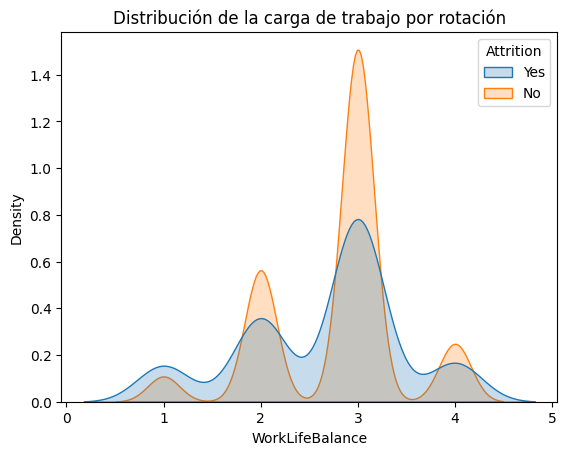

In [206]:
#Distribución de la carga de trabajo por rotación
sns.kdeplot(data=df, x='WorkLifeBalance', hue='Attrition', fill=True, common_norm=False)
plt.title('Distribución de la carga de trabajo por rotación')
plt.show()

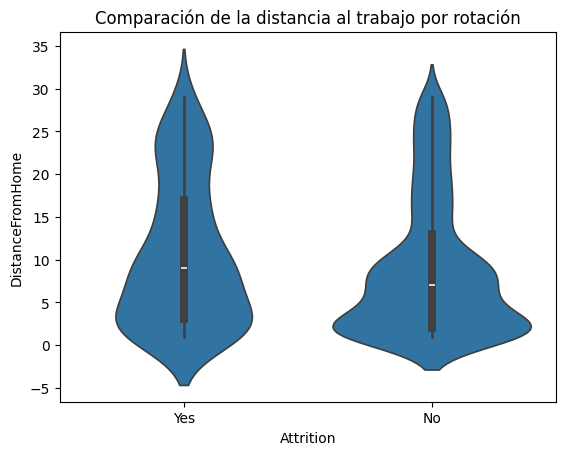

In [207]:
sns.violinplot(x='Attrition', y='DistanceFromHome', data=df)

plt.title('Comparación de la distancia al trabajo por rotación')
plt.show()

In [209]:
print(list(df.columns))

['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


Este es uno de los analisis mas impactantes y mas intuitivos. Podemos ver como casi el 100% de los empleados que se fueron, habian trabajado horas extra en su puesto. Claramente esto indica que hay una cierta carga extra laboral que pudo hacer que los empleados consideraran abandonar la empresa. 

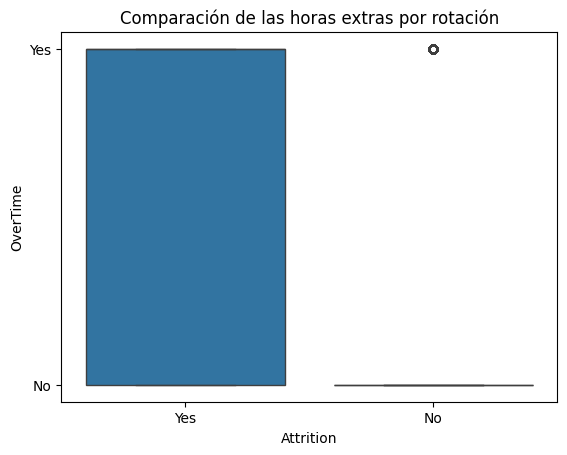

In [210]:
sns.boxplot(x='Attrition', y='OverTime', data=df)
plt.title('Comparación de las horas extras por rotación')
plt.show()

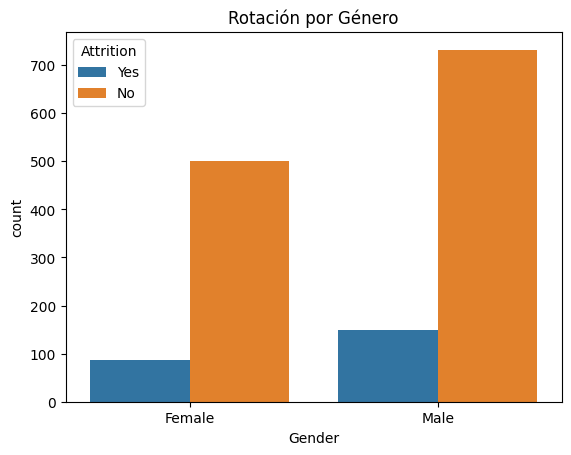

In [211]:
# Gráfico de barras apiladas para la rotación por género
sns.countplot(x='Gender', hue='Attrition', data=df)
plt.title('Rotación por Género')
plt.show()

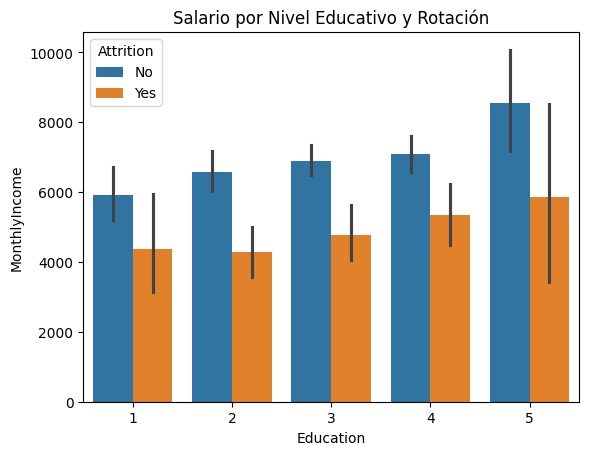

In [212]:
sns.barplot(x='Education', y='MonthlyIncome', hue='Attrition', data=df)
plt.title('Salario por Nivel Educativo y Rotación')
plt.show()

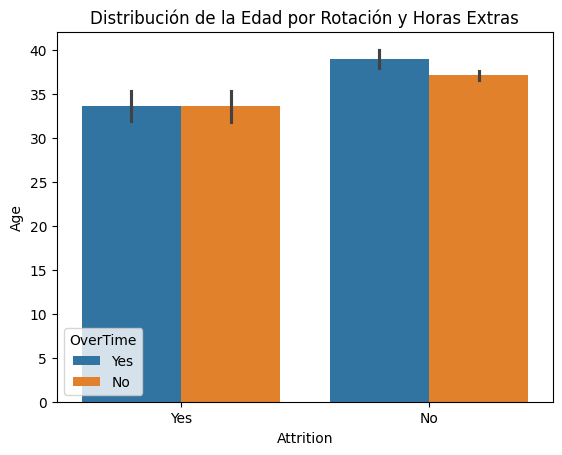

In [213]:
sns.barplot(x="Attrition", y="Age", hue="OverTime", data=df)
plt.title("Distribución de la Edad por Rotación y Horas Extras")
plt.show()

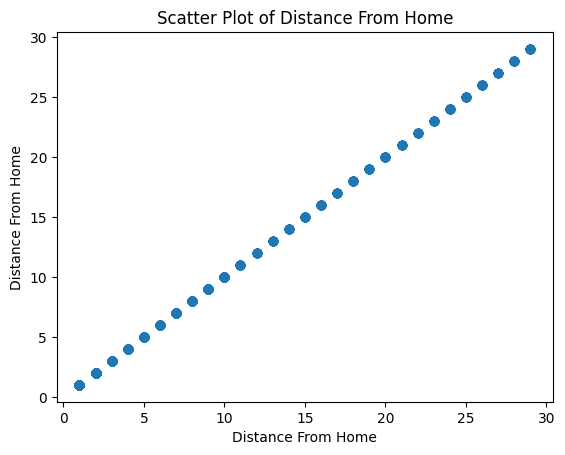

In [214]:
plt.scatter(df['DistanceFromHome'], df['DistanceFromHome'])  # 
plt.title('Scatter Plot of Distance From Home')
plt.xlabel('Distance From Home')
plt.ylabel('Distance From Home')
plt.show()

Datos previo a convertirlos para el procesamiento en los modelos. 

In [215]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


El siguiente codigo se encarga de recibir el dataset y transformar los valores que son categoricos o strings, y los transforma en valores numericos para un procesamiento sencillo.

In [271]:


# Identifica las columnas que no son numeros y las transforma
def datasetTransformation(dataSet):
    # Identificar columnas categóricas
    categoricalCols = dataSet.select_dtypes(include=['object']).columns.tolist()

    # Crear un objeto LabelEncoder
    labelEncoder = LabelEncoder()

    # Codificar cada columna categórica
    for col in categoricalCols:
        dataSet[col] = labelEncoder.fit_transform(dataSet[col])

    return dataSet




Aqui se realiza la transformacion y asi quedaria el dataset. Para no afectar los datos originales, se le pasa una copia del dataset a la funcion. 

In [272]:
newDataSet= datasetTransformation(df.copy())
newDataSet.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


La siguiente funcion es una de las mas importantes, esta recibe un dataset y un numero de colunas. Esta se va a encargar de seleccionar las mejores columnas segun el valor que le demos en el dataset. Se seleccionan las mejores caracteristicas usando la funcion chi2, que nos ayuda a determinar si existe una diferencia significativa entre lo que observamos en nuestros datos y lo que esperábamos encontrar. En este caso nos va a ayudar ya que va a analizar varios features categoricos.

In [217]:
def dataSelec(dataSet,columns):
    # Seleccionar las k mejores características
    selector = SelectKBest(chi2, k=columns)
    y = dataSet['Attrition']
    dataSet = dataSet.drop('Attrition', axis=1) #se elimina la columna Attrition ya que es nuestro Y o los labels
    XNew = selector.fit_transform(datasetTransformation(dataSet), y)
    SelectedFeatures = selector.get_feature_names_out()
    
    # Escalar las características seleccionadas
    scaler = StandardScaler()
    XScaled = scaler.fit_transform(XNew)

    # Balanceo de clases
    smote = SMOTE()
    XBalanced, yBalanced = smote.fit_resample(XScaled, y)
    return (XBalanced,yBalanced,XScaled,y, SelectedFeatures)

Esta funcion revisa si hay outliers en el subset con las N caracteristicas mas importantes. Se decidio utilizar todas las caracteristicas ya que el analisis manual de estas que fueron reportadas con outliers, pueden ser importantes, las que fueron encontras son: años trabajados en la empresa, años con el mismo manager, salario mensual. Como podemos notar, estas son caracteristicas que pueden llegar a variar pero son validas dentro de la empresa. 

In [218]:
numeric_columns = dataSelec(df.copy(),12)[4]
df1 = datasetTransformation(df.copy())

def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound


for column in numeric_columns:
    outliers, lower_bound, upper_bound = identify_outliers(df1, column)
    
    print(f"Análisis de outliers para {column}:\n")
    print(f"Rango normal: {lower_bound:.2f} - {upper_bound:.2f}")
    print(f"Número de outliers: {len(outliers)}")
    print(f"Porcentaje de outliers: {(len(outliers) / len(df1)) * 100:.2f}%")
    
    if len(outliers) > 0:
        print("Estadísticas de los outliers:")
        print(outliers[column].describe())
    
    print(f"\n")

Análisis de outliers para Age:

Rango normal: 10.50 - 62.50
Número de outliers: 0
Porcentaje de outliers: 0.00%


Análisis de outliers para DailyRate:

Rango normal: -573.00 - 2195.00
Número de outliers: 0
Porcentaje de outliers: 0.00%


Análisis de outliers para DistanceFromHome:

Rango normal: -16.00 - 32.00
Número de outliers: 0
Porcentaje de outliers: 0.00%


Análisis de outliers para JobLevel:

Rango normal: -2.00 - 6.00
Número de outliers: 0
Porcentaje de outliers: 0.00%


Análisis de outliers para MonthlyIncome:

Rango normal: -5291.00 - 16581.00
Número de outliers: 114
Porcentaje de outliers: 7.76%
Estadísticas de los outliers:
count      114.000000
mean     18399.666667
std       1093.085190
min      16595.000000
25%      17345.750000
50%      18716.500000
75%      19376.750000
max      19999.000000
Name: MonthlyIncome, dtype: float64


Análisis de outliers para MonthlyRate:

Rango normal: -10574.75 - 39083.25
Número de outliers: 0
Porcentaje de outliers: 0.00%


Análisis de o

Implementacion de modelo de KNN con ScikitLearn. En esta funcion recibimos la cantidad de features que queremos usar, el dataset, los k vecinos y si queremos que use los datos balanceados o no. El resultado nos va a mostrar  varios resultados, mretricas en fase de validation, metricas en fase de training y la matriz de confusion. 

In [285]:


def knn(columns, dataSet,neighbors,balanced):
    #Se seleccionan las mejores caracteristicas
    xBalanced = dataSelec(dataSet,columns)[0]
    yBalanced = dataSelec(dataSet,columns)[1]
    x = dataSelec(dataSet,columns)[2]
    y = dataSelec(dataSet,columns)[3]
    
    #Probar con datos balanceados o sin balancear
    if balanced:
        xTrainVal, xTest, yTrainVal, yTest = train_test_split(xBalanced, yBalanced, test_size=0.15, random_state=70)
        
    else:
        xTrainVal, xTest, yTrainVal, yTest = train_test_split(x, y, test_size=0.15, random_state=70)

    xTrain, xVal, yTrain, yVal = train_test_split(xTrainVal, yTrainVal, test_size=0.17, random_state=70)
    
    # Verificar las dimensiones de los set de training, validation y testing
    print("******************************************")
    print("Dimensiones de entrenamiento:", xTrain.shape)
    print("Dimensiones de validación:", xVal.shape)
    print("Dimensiones de prueba:", xTest.shape)
    print("Selected Features:", dataSelec(dataSet,columns)[4])
    print("******************************************",'\n')
   

    knn = KNeighborsClassifier(neighbors)
    knn.fit(xTrain, yTrain)

  # Evaluar el modelo con el validation dataset
    valAccuracy = accuracy_score(yVal, knn.predict(xVal))
    print("******************************************")
    print("Acurracy de validation:", accuracy_score(yVal, knn.predict(xVal)))
    print("Precision de validation:", precision_score(yVal, knn.predict(xVal)))
    print("Recall de validation:", recall_score(yVal, knn.predict(xVal)))
    print("******************************************",'\n')

  # Make predictions on the test set
    yPred = knn.predict(xTest)

    # Evaluacion de metricas del modelo
    print("******************************************")
    print("Accuracy de Testing:", accuracy_score(yTest, yPred))
    print("Precision de Testing:", precision_score(yTest, yPred))
    print("Recall de Testing:", recall_score(yTest, yPred))
    print("******************************************",'\n')

  #Matriz de confusion
    sns.heatmap(confusion_matrix(yTest, yPred), annot=True, fmt='d')
    plt.title('Matriz de Confusión')
    plt.xlabel('Predicciones')
    plt.ylabel('Valores Reales')
    plt.show()
    


******************************************
Dimensiones de entrenamiento: (1739, 15)
Dimensiones de validación: (357, 15)
Dimensiones de prueba: (370, 15)
Selected Features: ['Age' 'DailyRate' 'DistanceFromHome' 'EmployeeNumber' 'JobLevel'
 'JobRole' 'MaritalStatus' 'MonthlyIncome' 'MonthlyRate' 'OverTime'
 'StockOptionLevel' 'TotalWorkingYears' 'YearsAtCompany'
 'YearsInCurrentRole' 'YearsWithCurrManager']
****************************************** 

******************************************
Acurracy de validation: 0.7871148459383753
Precision de validation: 0.7370892018779343
Recall de validation: 0.8870056497175142
****************************************** 

******************************************
Accuracy de Testing: 0.8162162162162162
Precision de Testing: 0.7699530516431925
Recall de Testing: 0.8961748633879781
****************************************** 



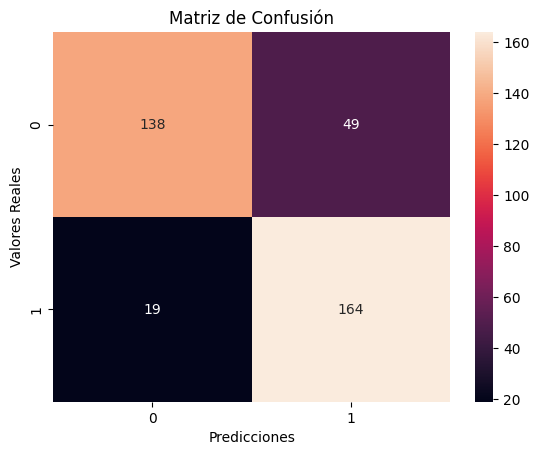

In [281]:
knn(columns=15, dataSet=newDataSet.copy(), neighbors=10, balanced=True)

******************************************
Dimensiones de entrenamiento: (1739, 25)
Dimensiones de validación: (357, 25)
Dimensiones de prueba: (370, 25)
Selected Features: ['Age' 'DailyRate' 'Department' 'DistanceFromHome' 'EducationField'
 'EmployeeNumber' 'EnvironmentSatisfaction' 'JobInvolvement' 'JobLevel'
 'JobRole' 'JobSatisfaction' 'MaritalStatus' 'MonthlyIncome' 'MonthlyRate'
 'NumCompaniesWorked' 'OverTime' 'RelationshipSatisfaction'
 'StockOptionLevel' 'TotalWorkingYears' 'TrainingTimesLastYear'
 'WorkLifeBalance' 'YearsAtCompany' 'YearsInCurrentRole'
 'YearsSinceLastPromotion' 'YearsWithCurrManager']
****************************************** 

******************************************
Acurracy de validation: 0.8683473389355743
Precision de validation: 0.8037383177570093
Recall de validation: 0.9717514124293786
****************************************** 

******************************************
Accuracy de Testing: 0.8432432432432433
Precision de Testing: 0.770562770562

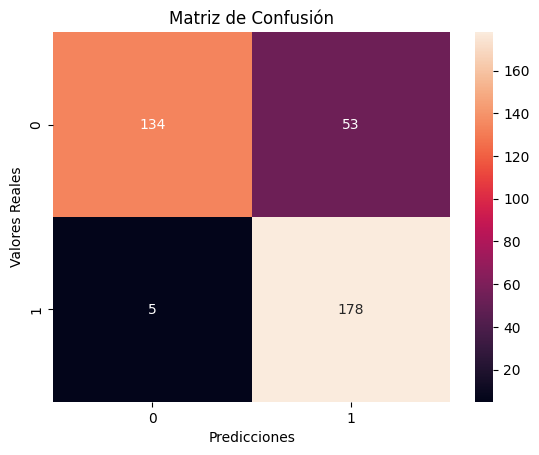

In [282]:
knn(columns=25, dataSet=newDataSet.copy(), neighbors=5, balanced=True)

Implementacion de modelo de Regresion Lineal con ScikitLearn. En esta funcion recibimos la cantidad de features que queremos usar, el dataset, los k vecinos y si queremos que use los datos balanceados o no. El resultado nos va a mostrar  varios resultados, mretricas en fase de validation, metricas en fase de training y la matriz de confusion. 

In [289]:
def logisticRegression(dataSet, columns, balanced):
    
    xBalanced = dataSelec(dataSet,columns)[0]
    yBalanced = dataSelec(dataSet,columns)[1]
    x = dataSelec(dataSet,columns)[2]
    y = dataSelec(dataSet,columns)[3]

    #Probar con datos balanceados o sin balancear
    if balanced:
        xTrainVal, xTest, yTrainVal, yTest = train_test_split(xBalanced, yBalanced, test_size=0.15, random_state=70)
        
    else:
        xTrainVal, xTest, yTrainVal, yTest = train_test_split(x, y, test_size=0.15, random_state=70)

    xTrain, xVal, yTrain, yVal = train_test_split(xTrainVal, yTrainVal, test_size=0.17, random_state=70)
    
    # Verificar las dimensiones de los set de training, validation y testing
    print("******************************************")
    print("Dimensiones de entrenamiento:", xTrain.shape)
    print("Dimensiones de validación:", xVal.shape)
    print("Dimensiones de prueba:", xTest.shape)
    print("Selected Features:", dataSelec(dataSet,columns)[4])
    print("******************************************",'\n')
    
    # Crear el modelo de Regresión Logística
    logistic_regression = LogisticRegression()

    # Entrenar el modelo
    logistic_regression.fit(xTrain, yTrain)

     # Evaluar el modelo con el validation dataset
    valAccuracy = accuracy_score(yVal, logistic_regression.predict(xVal))
    print("******************************************")
    print("Acurracy de validation:", accuracy_score(yVal, logistic_regression.predict(xVal)))
    print("Precision de validation:", precision_score(yVal, logistic_regression.predict(xVal)))
    print("Recall de validation:", recall_score(yVal, logistic_regression.predict(xVal)))
    print("******************************************",'\n')

    # Hacer predicciones
    yPred = logistic_regression.predict(xTest)

    #Metricas
    print("******************************************")
    print("Accuracy de Testing:", accuracy_score(yTest, yPred))
    print("Precision de Testing:", precision_score(yTest, yPred))
    print("Recall de Testing:", recall_score(yTest, yPred))
    print("******************************************",'\n')

    #Matriz de confusion
    palette = sns.color_palette( "inferno", n_colors= 15,)
    sns.heatmap(confusion_matrix(yTest, yPred), annot=True, fmt='d', cmap=palette)
    plt.title('Matriz de Confusión')
    plt.xlabel('Predicciones')
    plt.ylabel('Valores Reales')
    plt.show()

******************************************
Dimensiones de entrenamiento: (1036, 10)
Dimensiones de validación: (213, 10)
Dimensiones de prueba: (221, 10)
Selected Features: ['Age' 'DailyRate' 'DistanceFromHome' 'MonthlyIncome' 'MonthlyRate'
 'OverTime' 'TotalWorkingYears' 'YearsAtCompany' 'YearsInCurrentRole'
 'YearsWithCurrManager']
****************************************** 

******************************************
Acurracy de validation: 0.8497652582159625
Precision de validation: 1.0
Recall de validation: 0.15789473684210525
****************************************** 

******************************************
Accuracy de Testing: 0.8461538461538461
Precision de Testing: 1.0
Recall de Testing: 0.19047619047619047
****************************************** 



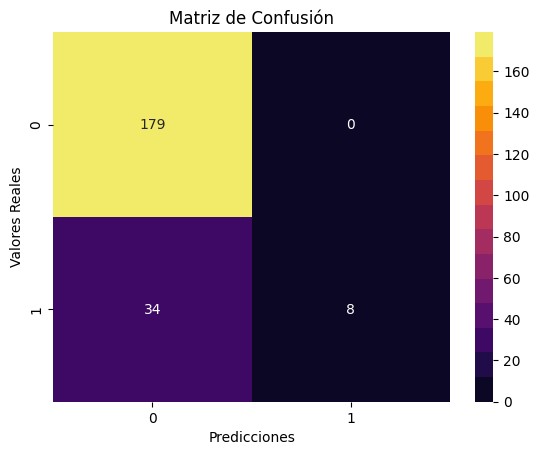

In [295]:
logisticRegression(newDataSet.copy(), 10,False)

******************************************
Dimensiones de entrenamiento: (1036, 28)
Dimensiones de validación: (213, 28)
Dimensiones de prueba: (221, 28)
Selected Features: ['Age' 'DailyRate' 'Department' 'DistanceFromHome' 'Education'
 'EducationField' 'EmployeeNumber' 'EnvironmentSatisfaction' 'Gender'
 'HourlyRate' 'JobInvolvement' 'JobLevel' 'JobRole' 'JobSatisfaction'
 'MaritalStatus' 'MonthlyIncome' 'MonthlyRate' 'NumCompaniesWorked'
 'OverTime' 'RelationshipSatisfaction' 'StockOptionLevel'
 'TotalWorkingYears' 'TrainingTimesLastYear' 'WorkLifeBalance'
 'YearsAtCompany' 'YearsInCurrentRole' 'YearsSinceLastPromotion'
 'YearsWithCurrManager']
****************************************** 

******************************************
Acurracy de validation: 0.8873239436619719
Precision de validation: 0.8888888888888888
Recall de validation: 0.42105263157894735
****************************************** 

******************************************
Accuracy de Testing: 0.8552036199095022


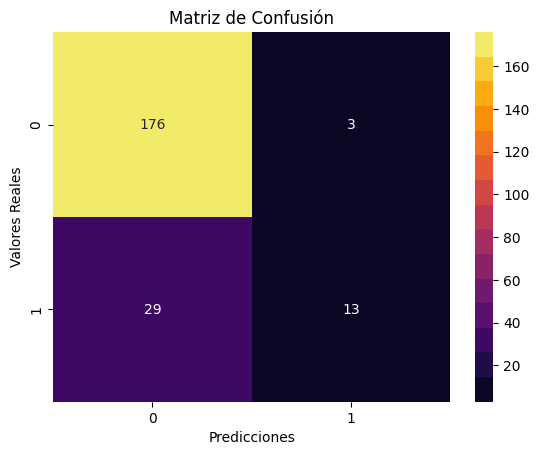

In [294]:
logisticRegression(newDataSet.copy(), 28,False)